In [4]:
!pip install pandas seaborn scikit-learn xgboost imbalanced-learn importlib-resources sklearn.preprocessing xgboost catboost celer

  Using cached sklearn_preprocessing-0.1.0-py3-none-any.whl (10 kB)


In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from celer import GroupLasso

In [6]:
df=pd.read_csv("airbnb-project-msba-kaggle-train.csv", low_memory=False)
df_crime=pd.read_csv("crime_data.csv", low_memory=False)
df_test=pd.read_csv("airbnb-project-msba-kaggle-test.csv", low_memory=False)

In [7]:
# Convert the 'zipcode' column in both DataFrames to string
df_crime['zipcode'] = df_crime['zipcode'].astype(str)
df['zipcode'] = df['zipcode'].astype(str)

# Merge the DataFrames on the 'zipcode' column using an inner join
df = pd.merge(df_crime, df, on='zipcode', how='inner')

# Display the head of the merged DataFrame to check it
df

,zipcode,Total Felonies (2020-2021),high_booking,listing_url,state,city,name,summary,space,description,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,bathrooms_text,region_id,region_name,region_parent_id,region_parent_name,host_listing_count,latitude_cleansed,longitude_cleansed
0,91910,1473,0,https://www.airbnb.com/rooms/7342622,ca,san-diego,A San Diego Historic Jewel,"Step back to 1896! Enjoy ping-pong, horseshoes...",The bedrooms are located on the 2nd floor of t...,"Step back to 1896! Enjoy ping-pong, horseshoes...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.644580,-117.067739
1,91910,1473,1,https://www.airbnb.com/rooms/7342622,ca,san-diego,"THE WING 1896 - Sunny Days, Starry Nights!","Step back into 1896! Enjoy ping-pong, horsesho...",The bedrooms are located on the 2nd floor of t...,"Step back into 1896! Enjoy ping-pong, horsesho...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.644580,-117.067739
2,91910,1473,0,https://www.airbnb.com/rooms/15068324,ca,san-diego,"Gorgeous guest house with large, solar heated ...","My place is close to restaurants, grocery stor...",NaN,"My place is close to restaurants, grocery stor...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.646227,-117.032982
3,91910,1473,0,https://www.airbnb.com/rooms/23826192,ca,san-diego,A Comfortable Refuge,We are in a delightfully quiet and historic n...,NaN,We are in a delightfully quiet and historic n...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.640968,-117.071741
4,91910,1473,0,https://www.airbnb.com/rooms/7342622,ca,san-diego,"THE WING 1896 - Sunny Days, Starry Nights!","Step back into 1896! Enjoy ping-pong, horsesho...",The bedrooms are located on the 2nd floor of t...,"Step back into 1896! Enjoy ping-pong, horsesho...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.644580,-117.067739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,92173,799,0,https://www.airbnb.com/rooms/32629320,ca,san-diego,Room 5: Las America-Private Master/Private Bath,Brand new renovated house for our loyal Airbnb...,Walking distance to Las Americas Premium Outle...,Brand new renovated house for our loyal Airbnb...,...,2.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,32.543900,-117.052680
8272,92173,799,0,https://www.airbnb.com/rooms/31002984,ca,san-diego,Convenient & Elegant 1 bedroom with 2 beds Condo,"1 Bedroom, 2 beds and 1 Bath fully furnished C...",Recently remodeled condominium in a clean and ...,"1 Bedroom, 2 beds and 1 Bath fully furnished C...",...,2.0,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,32.560280,-117.060880
8273,92173,799,0,https://www.airbnb.com/rooms/32629320,ca,san-diego,Room 5: Las America-Private Master/Private Bath,Brand new renovated house for our loyal Airbnb...,Walking distance to Las Americas Premium Outle...,Brand new renovated house for our loyal Airbnb...,...,2.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,32.543900,-117.052680
8274,92173,799,0,https://www.airbnb.com/rooms/31002984,ca,san-diego,Convenient & Elegant 1 bedroom with 2 beds Condo,"1 Bedroom, 2 beds and 1 Bath fully furnished C...",Recently remodeled condominium in a clean and ...,"1 Bedroom, 2 beds and 1 Bath fully furnished C...",...,2.0,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,32.560280,-117.060880


In [8]:

df_crime['zipcode'] = df_crime['zipcode'].astype(str)
df_test['zipcode'] = df_test['zipcode'].astype(str)

# Merge the DataFrames on the 'zipcode' column using an inner join
df_test = pd.merge(df_crime, df_test, on='zipcode', how='inner')

# Display the head of the merged DataFrame to check it
df_test

,zipcode,Total Felonies (2020-2021),unique_id,listing_url,state,city,name,summary,space,description,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,bathrooms_text,region_id,region_name,region_parent_id,region_parent_name,host_listing_count,latitude_cleansed,longitude_cleansed
0,91914,92,11544,https://www.airbnb.com/rooms/37859532,ca,san-diego,"Live, Work, Play during your Stay in San Diego!","Singles or Couples, this is the perfect spot! ...","This is a Private Studio, with 24/7 access, at...","Singles or Couples, this is the perfect spot! ...",...,1.0,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,32.661390,-116.944670
1,91914,92,11637,https://www.airbnb.com/rooms/37859532,ca,san-diego,"Live, Work, Play during your Stay in San Diego!","Singles or Couples, this is the perfect spot! ...","This is a Private Studio, with 24/7 access, at...","Singles or Couples, this is the perfect spot! ...",...,1.0,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,32.661390,-116.944670
2,91914,92,11730,https://www.airbnb.com/rooms/37859532,ca,san-diego,"Live, Work, Play during your Stay in San Diego!","Singles or Couples, this is the perfect spot! ...","This is a Private Studio, with 24/7 access, at...","Singles or Couples, this is the perfect spot! ...",...,1.0,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,32.661390,-116.944670
3,91915,208,10200,https://www.airbnb.com/rooms/4617296,ca,san-diego,Private Room With A 5 Star View,Our cool and comfortable bedroom has 2 twin be...,This place is great for everyone! Whether you ...,Our cool and comfortable bedroom has 2 twin be...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.618899,-116.956995
4,91915,208,10293,https://www.airbnb.com/rooms/20306365,ca,san-diego,Chula Vista Golf Course House,"Feel right at home in our spacious 5BR, 3.5BA ...","Feel right at home in our spacious 5BR, 3.5BA ...","Feel right at home in our spacious 5BR, 3.5BA ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.636940,-116.960497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,92139,246,12123,https://www.airbnb.com/rooms/38677815,ca,san-diego,Clean place to rest in quiet neighborhood,Well Lit room with ceiling fan and closet spac...,NaN,Well Lit room with ceiling fan and closet spac...,...,2.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,32.670260,-117.056920
2308,92139,246,12219,https://www.airbnb.com/rooms/35583618,ca,san-diego,Private room with shared bath close to everything,I live in a 2 story home in a safe and quiet n...,"Common areas, private bedroom, shared bath and...",I live in a 2 story home in a safe and quiet n...,...,30.0,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,32.677460,-117.040540
2309,92139,246,12225,https://www.airbnb.com/rooms/38677815,ca,san-diego,Clean place to rest in quiet neighborhood,Well Lit room with ceiling fan and closet spac...,NaN,Well Lit room with ceiling fan and closet spac...,...,2.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,32.670260,-117.056920
2310,92154,1376,10528,https://www.airbnb.com/rooms/27583659,ca,san-diego,Mile from Imperial Beach & Tijuana Border.,So close to the beach to enjoy beautiful Impe...,NaN,So close to the beach to enjoy beautiful Impe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.561306,-117.074040


In [9]:
filtered_rows = []

for index, row in df.iterrows():
    if row['city'] == 'san-diego':
        filtered_rows.append(row)

df_train = pd.DataFrame(filtered_rows)

In [10]:
filtered_rows = []

for index, row in df_test.iterrows():
    if row['city'] == 'san-diego':
        filtered_rows.append(row)

df_test = pd.DataFrame(filtered_rows)

In [11]:
# contains only NAs = 'region_parent_name', 'experiences_offered'
# other below columns are irrelevant columns 
df_train.drop(columns=['host_acceptance_rate', 'security_deposit', 'bathrooms_text','listing_url', 'picture_url', 'host_id', 'host_url', 'host_name','host_picture_url','medium_url','thumbnail_url','xl_picture_url','host_thumbnail_url','region_id','region_name','region_parent_id','region_parent_name', 'experiences_offered','license','neighborhood_overview','name','state', 'city', 'summary', 'space', 'description', 'host_location', 'host_about','street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed','market', 'latitude', 'latitude_cleansed', 'longitude', 'longitude_cleansed','jurisdiction_names', 'notes', 'transit', 'host_neighbourhood', 'smart_location', 'access', 'interaction', 'house_rules','country_code','host_listing_count','maximum_minimum_nights','minimum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
'maximum_nights_avg_ntm',"extra_people","host_listings_count","host_total_listings_count","monthly_price","is_business_travel_ready","weekly_price","square_feet"], inplace=True)

df_test.drop(columns=['host_acceptance_rate', 'security_deposit', 'bathrooms_text','listing_url', 'picture_url', 'host_id', 'host_url', 'host_name','host_picture_url','medium_url','thumbnail_url','xl_picture_url','host_thumbnail_url','region_id','region_name','region_parent_id','region_parent_name', 'experiences_offered','license','neighborhood_overview','name','state', 'city', 'summary', 'space', 'description', 'host_location', 'host_about','street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed','market', 'latitude', 'latitude_cleansed', 'longitude', 'longitude_cleansed','jurisdiction_names', 'notes', 'transit', 'host_neighbourhood', 'smart_location', 'access', 'interaction', 'house_rules','country_code','host_listing_count','maximum_minimum_nights','minimum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                      'maximum_nights_avg_ntm',"extra_people","host_listings_count","host_total_listings_count","monthly_price","is_business_travel_ready","weekly_price","square_feet"], inplace=True)

In [12]:
list = ["price","cleaning_fee"]
for i in list:
    if df_train[i].dtype == 'object':  # Check if the column is of object type (string)
        df_train[i] = df_train[i].str.replace('$', '').str.replace(',', '').astype(float)
        df_train[i] = pd.to_numeric(df_train[i])

for i in list:
    if df_test[i].dtype == 'object':  # Check if the column is of object type (string)
        df_test[i] = df_test[i].str.replace('$', '').str.replace(',', '').astype(float)
        df_test[i] = pd.to_numeric(df_test[i])

In [13]:
# Define the list of columns with '%' sign to be processed
list = ["host_response_rate"]

# Process the columns in the training DataFrame
for i in list:
    df_train[i] = df_train[i].str.replace('%', '')  # Remove '%' sign
    df_train[i] = df_train[i].str.replace(',', '')  # Remove any commas if present
    df_train[i] = pd.to_numeric(df_train[i], errors='coerce')  # Convert to numeric, handle errors

# Process the columns in the test DataFrame
for i in list:
    df_test[i] = df_test[i].str.replace('%', '')  # Remove '%' sign
    df_test[i] = df_test[i].str.replace(',', '')  # Remove any commas if present
    df_test[i] = pd.to_numeric(df_test[i], errors='coerce')  # Convert to numeric, handle errors

In [14]:
# Mapping dictionary for each column
mapping = {
    'is_location_exact': {True: 1, False: 0},
    'bed_type': {'Real Bed': 0, 'Pull-out Sofa': 1, 'Futon': 2, 'Airbed': 3, 'Couch': 4},
    'requires_license': {True: 1, False: 0},
    'require_guest_profile_picture': {True: 1, False: 0},
    'require_guest_phone_verification': {True: 1, False: 0},
    'host_is_superhost': {True: 1, False: 0},
    'host_has_profile_pic': {True: 1, False: 0},
    'host_identity_verified': {True: 1, False: 0},
    'instant_bookable': {True: 1, False: 0},
    "room_type": {"Entire home/apt": 3, "Private room": 1,"Shared room": 0, "Hotel room": 2}
}

# Apply mapping to each column
for column, values in mapping.items():
    df_train[column] = df_train[column].map(values)
    
# Apply mapping to each column
for column, values in mapping.items():
    df_test[column] = df_test[column].map(values)

In [15]:
#we are quantifying the amenities column
df_train['amenities'] = df_train['amenities'].str.replace(r'[\[\]{}"]', '', regex=True)

df_test['amenities'] = df_test['amenities'].str.replace(r'[\[\]{}"]', '', regex=True)
df_test['amenities'] = df_test['amenities'].apply(lambda x: x.count(',') + 1 if pd.notnull(x) else None)

In [16]:
# List of specific amenities to encode
amenities_to_encode = ['workspace', 'bbq', 'grill', 'patio', 'pool', 'fireplace']

# Create new columns for each amenity
for amenity in amenities_to_encode:
    # Use str.contains to check for the presence of each amenity, case insensitive
    df_train[amenity] = df_train['amenities'].str.contains(amenity, case=False, na=False).astype(int)



In [17]:
df_train['amenities'] = df_train['amenities'].apply(lambda x: x.count(',') + 1 if pd.notnull(x) else None)


In [18]:
#we are quantifying the host_verifications column
df_train['host_verifications'] = df_train['host_verifications'].str.replace(r'[\[\]"]', '', regex=True)
df_train['host_verifications'] = df_train['host_verifications'].apply(lambda x: x.count(',') + 1 if pd.notnull(x) else None)

df_test['host_verifications'] = df_test['host_verifications'].str.replace(r'[\[\]"]', '', regex=True)
df_test['host_verifications'] = df_test['host_verifications'].apply(lambda x: x.count(',') + 1 if pd.notnull(x) else None)

In [19]:
#grouping different property type and applying one hot encoding to "property_type","bed_type", "room_type"
df_train['property_type'] = df_train['property_type'].str.lower()
c = ["entire", "apart", "hotel", "house", "shared", "other"]
words_to_check = ["entire"]
for index, property_type in df_train['property_type'].items():
    if isinstance(property_type, str):
        for word in words_to_check: 
            if "entire" in property_type.split():
                df_train.at[index, 'property_type'] = "entire"
            elif "aparthotel" in property_type.split():
                df_train.at[index, 'property_type'] = "apartment"
            elif "apart" in property_type.split():
                df_train.at[index, 'property_type'] = "apartment"
            elif "hotel" in property_type.split():
                df_train.at[index, 'property_type'] = "hotel"
            elif "house" in property_type.split():
                df_train.at[index, 'property_type'] = "house"
            elif "Townhouse" in property_type.split():
                df_train.at[index, 'property_type'] = "private room"
            elif "private" in property_type.split():
                df_train.at[index, 'property_type'] = "private room"
            elif "shared" in property_type.split():
                df_train.at[index, 'property_type'] = "shared"
            else:
                df_train.at[index, 'property_type'] = "other"

df_train = pd.get_dummies(df_train, columns=["property_type"],  dtype=int)

#grouping different property type and applying one hot encoding to "property_type","bed_type", "room_type"
df_test['property_type'] = df_test['property_type'].str.lower()
c = ["entire", "apart", "hotel", "house", "shared", "other"]

words_to_check = ["entire"]

for index, property_type in df_test['property_type'].items():
    if isinstance(property_type, str):
        for word in words_to_check:
            if "entire" in property_type.split():
                df_test.at[index, 'property_type'] = "entire"
            elif "aparthotel" in property_type.split():
                df_test.at[index, 'property_type'] = "apartment"
            elif "apart" in property_type.split():
                df_test.at[index, 'property_type'] = "apartment"
            elif "hotel" in property_type.split():
                df_test.at[index, 'property_type'] = "hotel"
            elif "house" in property_type.split():
                df_test.at[index, 'property_type'] = "house"
            elif "Townhouse" in property_type.split():
                df_test.at[index, 'property_type'] = "private room"
            elif "private" in property_type.split():
                df_test.at[index, 'property_type'] = "private room"
            elif "shared" in property_type.split():
                df_test.at[index, 'property_type'] = "shared"
            else:
                df_test.at[index, 'property_type'] = "other"

df_test = pd.get_dummies(df_test, columns=["property_type"],  dtype=int)

In [20]:
# Quantifying the cancellation_policy column with 0 and 1
policy_mapping = {
    'flexible': 0,
    'moderate': 0,
    'luxury_moderate': 0,
    'strict': 1,
    'super_strict_60': 1,
    'super_strict_30': 1,
    'luxury_super_strict_95': 1,
    'no_refunds': 1
}

# Map the cancellation_policy column using the mapping dictionary
df_train['cancellation_policy'] = df_train['cancellation_policy'].map(policy_mapping)

df_test['cancellation_policy'] = df_test['cancellation_policy'].map(policy_mapping)

In [21]:
# Define the mapping of response times to numerical values
response_time_mapping = {
    'within an hour': 0,
    'within a few hours': 1,
    'within a day': 2,
    'a few days or more': 3
}

# Map the response times to numerical values in the DataFrame
df_train['host_response_time'] = df_train['host_response_time'].map(response_time_mapping)
# Map the response times to numerical values in the DataFrame
df_test['host_response_time'] = df_test['host_response_time'].map(response_time_mapping)

In [22]:
df_train.to_csv('df.csv', index=False)

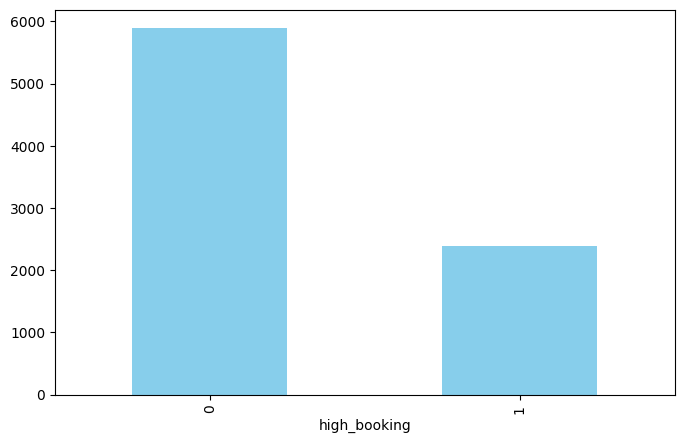

In [23]:
import matplotlib.pyplot as plt

class_counts = df_train['high_booking'].value_counts()
total_samples = class_counts.sum()
max_class_count = class_counts.max()
balance_ratio = max_class_count / total_samples

plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color='skyblue')
plt.show()

In [24]:
discrete_columns = []
continuous_columns = []

# Define a threshold for what you consider a 'low' number of unique values for discrete columns
threshold = 15  # This threshold can be adjusted based on your specific data characteristics

# Loop through each column in the DataFrame
for column in df_train.columns:
    if (df_train[column].nunique() <= threshold):
        discrete_columns.append(column)
    else:
        continuous_columns.append(column)

print("Discrete columns:", discrete_columns)
print("Continuous columns:", continuous_columns)

Discrete columns: ['high_booking', 'host_response_time', 'host_is_superhost', 'is_location_exact', 'room_type', 'accommodates', 'bedrooms', 'bed_type', 'guests_included', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'workspace', 'bbq', 'grill', 'patio', 'pool', 'fireplace', 'property_type_hotel', 'property_type_house', 'property_type_other']
Continuous columns: ['zipcode', 'Total Felonies (2020-2021)', 'host_response_rate', 'bathrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'reviews_per_month', 'amenities', 'cleaning_fee']


In [25]:
import pandas as pd
from sklearn.impute import KNNImputer

#
discrete_columns = ['high_booking', 'host_response_time', 'host_is_superhost', 'is_location_exact', 'room_type', 'accommodates', 'bedrooms', 'bed_type', 'guests_included', 'requires_license', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'property_type_hotel', 'property_type_house', 'property_type_other']
continuous_columns = ['host_response_rate', 'bathrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'amenities', 'cleaning_fee']
# Fill discrete columns with mode
for column in discrete_columns:
    mode_value = df_train[column].mode()[0]
    df_train[column].fillna(mode_value, inplace=True)

# Fill continuous columns with KNN
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors
df_train[continuous_columns] = knn_imputer.fit_transform(df_train[continuous_columns])

# Check the DataFrame after imputation
print(df_train.head())


  zipcode  Total Felonies (2020-2021)  high_booking  host_response_time  \
0   91910                        1473             0                 0.0   
1   91910                        1473             1                 0.0   
2   91910                        1473             0                 0.0   
3   91910                        1473             0                 1.0   
4   91910                        1473             0                 0.0   

   host_response_rate  host_is_superhost  is_location_exact  room_type  \
0               100.0                0.0                  1          1   
1               100.0                0.0                  1          1   
2               100.0                0.0                  1          3   
3               100.0                0.0                  1          1   
4               100.0                0.0                  1          1   

   accommodates  bathrooms  ...  require_guest_phone_verification  workspace  \
0           4.0        1

In [26]:
df_train

,zipcode,Total Felonies (2020-2021),high_booking,host_response_time,host_response_rate,host_is_superhost,is_location_exact,room_type,accommodates,bathrooms,...,require_guest_phone_verification,workspace,bbq,grill,patio,pool,fireplace,property_type_hotel,property_type_house,property_type_other
0,91910,1473,0,0.0,100.0,0.0,1,1,4.0,1.0,...,0,1,0,0,0,1,1,0,1,0
1,91910,1473,1,0.0,100.0,0.0,1,1,4.0,1.0,...,0,1,1,1,1,1,1,0,1,0
2,91910,1473,0,0.0,100.0,0.0,1,3,6.0,1.0,...,0,0,0,0,0,1,0,0,0,1
3,91910,1473,0,1.0,100.0,0.0,1,1,2.0,1.0,...,0,1,0,0,0,0,0,0,1,0
4,91910,1473,0,0.0,100.0,0.0,1,1,4.0,1.0,...,0,1,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,92173,799,0,0.0,100.0,0.0,1,1,2.0,1.0,...,0,1,0,0,0,0,1,0,1,0
8272,92173,799,0,1.0,100.0,1.0,1,3,4.0,1.0,...,0,0,0,0,1,1,0,0,0,1
8273,92173,799,0,0.0,90.0,0.0,1,1,2.0,1.0,...,0,1,0,0,0,0,1,0,1,0
8274,92173,799,0,1.0,100.0,1.0,1,3,4.0,1.0,...,0,0,0,0,1,1,0,0,0,1


In [27]:
missing_values = df_train.isna().sum()
print(missing_values)

zipcode                             0
Total Felonies (2020-2021)          0
high_booking                        0
host_response_time                  0
host_response_rate                  0
host_is_superhost                   0
is_location_exact                   0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
price                               0
guests_included                     0
minimum_nights                      0
maximum_nights                      0
review_scores_rating                0
review_scores_accuracy              0
review_scores_cleanliness           0
review_scores_checkin               0
review_scores_communication         0
review_scores_location              0
review_scores_value                 0
requires_license                    0
reviews_per_month                   0
host_verific

In [28]:
# Separate features and target variable
X_train = df_train.drop('high_booking', axis=1)
y_train = df_train['high_booking']
X_test = df_test

In [29]:
print("Original class distribution:", Counter(y_train))

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:", Counter(y_train))

Original class distribution: Counter({0: 5892, 1: 2384})
Resampled class distribution: Counter({0: 5892, 1: 5892})


In [30]:
column_order = X_train.columns

X_train = X_train.reindex(columns=column_order)
X_test = X_test.reindex(columns=column_order)

In [31]:
for i in X_train:
    print(X_train[i])

0        91910.0
1        91910.0
2        91910.0
3        91910.0
4        91910.0
          ...   
11779    92120.0
11780    92131.0
11781    92103.0
11782    92130.0
11783    92120.0
Name: zipcode, Length: 11784, dtype: object
0        1473
1        1473
2        1473
3        1473
4        1473
         ... 
11779     534
11780     182
11781    1064
11782     339
11783     534
Name: Total Felonies (2020-2021), Length: 11784, dtype: int64
0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
11779    0.0
11780    0.0
11781    0.0
11782    0.0
11783    0.0
Name: host_response_time, Length: 11784, dtype: float64
0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
11779     94.0
11780     79.4
11781    100.0
11782    100.0
11783    100.0
Name: host_response_rate, Length: 11784, dtype: float64
0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
11779    0.000000
11780  

In [32]:
param_grid = {
    'iterations': [100, 200, 300],  # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'depth': [4, 6, 8],  # Depth of the trees
    'bagging_temperature': [0.5, 1.0],  # Controls the intensity of the Bayesian bootstrap
}

# Initialize CatBoost regressor
catboost = CatBoostRegressor()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train, verbose=100)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize CatBoost regressor with the best hyperparameters
catboost_best = CatBoostRegressor(**best_params)

# Fit the model on the entire training set
catboost_best.fit(X_train, y_train, verbose=100)

# Predict on the testing set
y_pred = catboost_best.predict(X_test)


0:	learn: 0.4977339	total: 104ms	remaining: 10.3s
99:	learn: 0.4212442	total: 216ms	remaining: 0us
0:	learn: 0.4979329	total: 1.57ms	remaining: 156ms
99:	learn: 0.4261482	total: 122ms	remaining: 0us
0:	learn: 0.4982931	total: 2.02ms	remaining: 200ms
99:	learn: 0.4246160	total: 123ms	remaining: 0us
0:	learn: 0.4984504	total: 1.69ms	remaining: 167ms
99:	learn: 0.4266797	total: 119ms	remaining: 0us
0:	learn: 0.4980627	total: 1.43ms	remaining: 142ms
99:	learn: 0.4225874	total: 111ms	remaining: 0us
0:	learn: 0.4980729	total: 1.5ms	remaining: 148ms
99:	learn: 0.4232512	total: 111ms	remaining: 0us
0:	learn: 0.4985334	total: 1.36ms	remaining: 135ms
99:	learn: 0.4151573	total: 109ms	remaining: 0us
0:	learn: 0.4959490	total: 1.21ms	remaining: 120ms
99:	learn: 0.4253597	total: 108ms	remaining: 0us
0:	learn: 0.4956734	total: 1.19ms	remaining: 118ms
99:	learn: 0.4250392	total: 108ms	remaining: 0us
0:	learn: 0.4956797	total: 1.29ms	remaining: 127ms
99:	learn: 0.4250849	total: 111ms	remaining: 0us
0:

100:	learn: 0.4262425	total: 111ms	remaining: 220ms
200:	learn: 0.3953542	total: 224ms	remaining: 110ms
299:	learn: 0.3773085	total: 335ms	remaining: 0us
0:	learn: 0.4980627	total: 1.33ms	remaining: 399ms
100:	learn: 0.4221208	total: 112ms	remaining: 220ms
200:	learn: 0.3902189	total: 226ms	remaining: 111ms
299:	learn: 0.3720747	total: 342ms	remaining: 0us
0:	learn: 0.4980729	total: 1.28ms	remaining: 384ms
100:	learn: 0.4227928	total: 111ms	remaining: 219ms
200:	learn: 0.3913415	total: 224ms	remaining: 110ms
299:	learn: 0.3733921	total: 333ms	remaining: 0us
0:	learn: 0.4985334	total: 1.35ms	remaining: 404ms
100:	learn: 0.4146451	total: 125ms	remaining: 245ms
200:	learn: 0.3812913	total: 239ms	remaining: 118ms
299:	learn: 0.3625047	total: 356ms	remaining: 0us
0:	learn: 0.4959490	total: 1.11ms	remaining: 331ms
100:	learn: 0.4249332	total: 109ms	remaining: 215ms
200:	learn: 0.3947050	total: 216ms	remaining: 107ms
299:	learn: 0.3775266	total: 320ms	remaining: 0us
0:	learn: 0.4956734	total:

99:	learn: 0.2737973	total: 187ms	remaining: 0us
0:	learn: 0.4813147	total: 1.97ms	remaining: 195ms
99:	learn: 0.2774177	total: 190ms	remaining: 0us
0:	learn: 0.4811961	total: 2.04ms	remaining: 202ms
99:	learn: 0.2738442	total: 198ms	remaining: 0us
0:	learn: 0.4973909	total: 2.23ms	remaining: 444ms
100:	learn: 0.3979010	total: 222ms	remaining: 218ms
199:	learn: 0.3576550	total: 437ms	remaining: 0us
0:	learn: 0.4975447	total: 2.1ms	remaining: 419ms
100:	learn: 0.4017711	total: 198ms	remaining: 194ms
199:	learn: 0.3618455	total: 398ms	remaining: 0us
0:	learn: 0.4980317	total: 2.11ms	remaining: 420ms
100:	learn: 0.4015634	total: 195ms	remaining: 191ms
199:	learn: 0.3615384	total: 388ms	remaining: 0us
0:	learn: 0.4980907	total: 2.22ms	remaining: 443ms
100:	learn: 0.4020111	total: 197ms	remaining: 193ms
199:	learn: 0.3621124	total: 392ms	remaining: 0us
0:	learn: 0.4977162	total: 2.03ms	remaining: 405ms
100:	learn: 0.3971239	total: 197ms	remaining: 193ms
199:	learn: 0.3561184	total: 392ms	re

200:	learn: 0.2611726	total: 396ms	remaining: 195ms
299:	learn: 0.2362755	total: 592ms	remaining: 0us
0:	learn: 0.4893470	total: 1.9ms	remaining: 568ms
100:	learn: 0.3139693	total: 187ms	remaining: 369ms
200:	learn: 0.2739618	total: 373ms	remaining: 184ms
299:	learn: 0.2494740	total: 555ms	remaining: 0us
0:	learn: 0.4889708	total: 1.92ms	remaining: 574ms
100:	learn: 0.3138474	total: 188ms	remaining: 370ms
200:	learn: 0.2746134	total: 376ms	remaining: 185ms
299:	learn: 0.2507491	total: 558ms	remaining: 0us
0:	learn: 0.4889109	total: 2.16ms	remaining: 646ms
100:	learn: 0.3139063	total: 194ms	remaining: 381ms
200:	learn: 0.2747315	total: 384ms	remaining: 189ms
299:	learn: 0.2496834	total: 570ms	remaining: 0us
0:	learn: 0.4832643	total: 2.1ms	remaining: 630ms
100:	learn: 0.2656833	total: 199ms	remaining: 392ms
200:	learn: 0.2230721	total: 394ms	remaining: 194ms
299:	learn: 0.2002722	total: 590ms	remaining: 0us
0:	learn: 0.4832287	total: 2.08ms	remaining: 621ms
100:	learn: 0.2643268	total: 

100:	learn: 0.2618619	total: 492ms	remaining: 483ms
199:	learn: 0.2216663	total: 983ms	remaining: 0us
0:	learn: 0.4877911	total: 7.57ms	remaining: 1.51s
100:	learn: 0.2686035	total: 494ms	remaining: 484ms
199:	learn: 0.2309923	total: 929ms	remaining: 0us
0:	learn: 0.4871126	total: 6.77ms	remaining: 1.35s
100:	learn: 0.2711721	total: 448ms	remaining: 440ms
199:	learn: 0.2322251	total: 884ms	remaining: 0us
0:	learn: 0.4875437	total: 6.94ms	remaining: 1.38s
100:	learn: 0.2680574	total: 446ms	remaining: 437ms
199:	learn: 0.2312722	total: 886ms	remaining: 0us
0:	learn: 0.4794370	total: 8.02ms	remaining: 1.59s
100:	learn: 0.2242754	total: 511ms	remaining: 501ms
199:	learn: 0.1875324	total: 1.01s	remaining: 0us
0:	learn: 0.4804722	total: 7.61ms	remaining: 1.51s
100:	learn: 0.2227203	total: 505ms	remaining: 495ms
199:	learn: 0.1865208	total: 993ms	remaining: 0us
0:	learn: 0.4822424	total: 7.8ms	remaining: 1.55s
100:	learn: 0.2208708	total: 507ms	remaining: 497ms
199:	learn: 0.1857922	total: 99

99:	learn: 0.4212442	total: 113ms	remaining: 0us
0:	learn: 0.4979329	total: 1.32ms	remaining: 131ms
99:	learn: 0.4261482	total: 112ms	remaining: 0us
0:	learn: 0.4982931	total: 1.14ms	remaining: 113ms
99:	learn: 0.4246160	total: 109ms	remaining: 0us
0:	learn: 0.4984504	total: 1.25ms	remaining: 124ms
99:	learn: 0.4266797	total: 110ms	remaining: 0us
0:	learn: 0.4980627	total: 1.23ms	remaining: 122ms
99:	learn: 0.4225874	total: 110ms	remaining: 0us
0:	learn: 0.4980729	total: 1.2ms	remaining: 119ms
99:	learn: 0.4232512	total: 108ms	remaining: 0us
0:	learn: 0.4985334	total: 1.18ms	remaining: 116ms
99:	learn: 0.4151573	total: 109ms	remaining: 0us
0:	learn: 0.4959490	total: 1.25ms	remaining: 124ms
99:	learn: 0.4253597	total: 111ms	remaining: 0us
0:	learn: 0.4956734	total: 1.1ms	remaining: 109ms
99:	learn: 0.4250392	total: 108ms	remaining: 0us
0:	learn: 0.4956797	total: 1.23ms	remaining: 122ms
99:	learn: 0.4250849	total: 112ms	remaining: 0us
0:	learn: 0.4927016	total: 1.2ms	remaining: 119ms
99:

100:	learn: 0.4262425	total: 122ms	remaining: 240ms
200:	learn: 0.3953542	total: 241ms	remaining: 118ms
299:	learn: 0.3773085	total: 355ms	remaining: 0us
0:	learn: 0.4980627	total: 1.44ms	remaining: 431ms
100:	learn: 0.4221208	total: 132ms	remaining: 260ms
200:	learn: 0.3902189	total: 251ms	remaining: 123ms
299:	learn: 0.3720747	total: 367ms	remaining: 0us
0:	learn: 0.4980729	total: 1.28ms	remaining: 384ms
100:	learn: 0.4227928	total: 116ms	remaining: 228ms
200:	learn: 0.3913415	total: 237ms	remaining: 117ms
299:	learn: 0.3733921	total: 357ms	remaining: 0us
0:	learn: 0.4985334	total: 1.46ms	remaining: 436ms
100:	learn: 0.4146451	total: 118ms	remaining: 233ms
200:	learn: 0.3812913	total: 239ms	remaining: 118ms
299:	learn: 0.3625047	total: 356ms	remaining: 0us
0:	learn: 0.4959490	total: 1.33ms	remaining: 398ms
100:	learn: 0.4249332	total: 115ms	remaining: 226ms
200:	learn: 0.3947050	total: 232ms	remaining: 114ms
299:	learn: 0.3775266	total: 342ms	remaining: 0us
0:	learn: 0.4956734	total:

99:	learn: 0.2737973	total: 189ms	remaining: 0us
0:	learn: 0.4813147	total: 2.25ms	remaining: 223ms
99:	learn: 0.2774177	total: 186ms	remaining: 0us
0:	learn: 0.4811961	total: 1.96ms	remaining: 194ms
99:	learn: 0.2738442	total: 187ms	remaining: 0us
0:	learn: 0.4973909	total: 2.23ms	remaining: 445ms
100:	learn: 0.3979010	total: 196ms	remaining: 192ms
199:	learn: 0.3576550	total: 395ms	remaining: 0us
0:	learn: 0.4975447	total: 2.13ms	remaining: 424ms
100:	learn: 0.4017711	total: 197ms	remaining: 193ms
199:	learn: 0.3618455	total: 398ms	remaining: 0us
0:	learn: 0.4980317	total: 2.36ms	remaining: 469ms
100:	learn: 0.4015634	total: 209ms	remaining: 204ms
199:	learn: 0.3615384	total: 404ms	remaining: 0us
0:	learn: 0.4980907	total: 2.08ms	remaining: 413ms
100:	learn: 0.4020111	total: 199ms	remaining: 195ms
199:	learn: 0.3621124	total: 396ms	remaining: 0us
0:	learn: 0.4977162	total: 2.46ms	remaining: 490ms
100:	learn: 0.3971239	total: 214ms	remaining: 209ms
199:	learn: 0.3561184	total: 414ms	r

200:	learn: 0.2611726	total: 399ms	remaining: 196ms
299:	learn: 0.2362755	total: 599ms	remaining: 0us
0:	learn: 0.4893470	total: 1.99ms	remaining: 596ms
100:	learn: 0.3139693	total: 188ms	remaining: 371ms
200:	learn: 0.2739618	total: 375ms	remaining: 185ms
299:	learn: 0.2494740	total: 560ms	remaining: 0us
0:	learn: 0.4889708	total: 2.06ms	remaining: 615ms
100:	learn: 0.3138474	total: 188ms	remaining: 370ms
200:	learn: 0.2746134	total: 375ms	remaining: 185ms
299:	learn: 0.2507491	total: 559ms	remaining: 0us
0:	learn: 0.4889109	total: 2.1ms	remaining: 627ms
100:	learn: 0.3139063	total: 187ms	remaining: 369ms
200:	learn: 0.2747315	total: 373ms	remaining: 184ms
299:	learn: 0.2496834	total: 559ms	remaining: 0us
0:	learn: 0.4832643	total: 2.25ms	remaining: 674ms
100:	learn: 0.2656833	total: 200ms	remaining: 394ms
200:	learn: 0.2230721	total: 400ms	remaining: 197ms
299:	learn: 0.2002722	total: 604ms	remaining: 0us
0:	learn: 0.4832287	total: 2.16ms	remaining: 645ms
100:	learn: 0.2643268	total:

100:	learn: 0.2618619	total: 497ms	remaining: 487ms
199:	learn: 0.2216663	total: 1.01s	remaining: 0us
0:	learn: 0.4877911	total: 6.76ms	remaining: 1.35s
100:	learn: 0.2686035	total: 443ms	remaining: 435ms
199:	learn: 0.2309923	total: 885ms	remaining: 0us
0:	learn: 0.4871126	total: 7.01ms	remaining: 1.4s
100:	learn: 0.2711721	total: 490ms	remaining: 480ms
199:	learn: 0.2322251	total: 942ms	remaining: 0us
0:	learn: 0.4875437	total: 6.86ms	remaining: 1.36s
100:	learn: 0.2680574	total: 449ms	remaining: 440ms
199:	learn: 0.2312722	total: 881ms	remaining: 0us
0:	learn: 0.4794370	total: 7.52ms	remaining: 1.5s
100:	learn: 0.2242754	total: 493ms	remaining: 483ms
199:	learn: 0.1875324	total: 987ms	remaining: 0us
0:	learn: 0.4804722	total: 7.38ms	remaining: 1.47s
100:	learn: 0.2227203	total: 497ms	remaining: 488ms
199:	learn: 0.1865208	total: 982ms	remaining: 0us
0:	learn: 0.4822424	total: 7.62ms	remaining: 1.52s
100:	learn: 0.2208708	total: 508ms	remaining: 498ms
199:	learn: 0.1857922	total: 1.1

100:	learn: 0.2262293	total: 513ms	remaining: 1.01s
200:	learn: 0.1914804	total: 1.08s	remaining: 533ms
299:	learn: 0.1716816	total: 1.59s	remaining: 0us
0:	learn: 0.4811864	total: 7.42ms	remaining: 2.22s
100:	learn: 0.2262293	total: 505ms	remaining: 995ms
200:	learn: 0.1914804	total: 999ms	remaining: 492ms
299:	learn: 0.1716816	total: 1.5s	remaining: 0us


In [34]:
X_train.columns

Index(['zipcode', 'Total Felonies (2020-2021)', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'is_location_exact',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'guests_included', 'minimum_nights',
       'maximum_nights', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'reviews_per_month',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'amenities', 'cleaning_fee', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'workspace', 'bbq', 'grill', 'patio', 'pool', 'fireplace',
       'property_type_hotel', 'property_type_house', 'property_type_other'],
      dtype='object')